# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Joachim Airlangga Nurdiana Putra
- **Email:** airlanggap72@gmail.com
- **ID Dicoding:** 

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa faktor yang paling berpengaruh pada jumlah pengguna sepeda registered dan casual
- Pertanyaan 2 : Pada Musim apa pengguna sepeda registered dan casual paling sering menggunakan jasa *Bike Sharing*

## Library

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Wrangling

### Gathering Data

In [52]:
df_hour = pd.read_csv('data/hour.csv', sep = ',')
df_day = pd.read_csv('data/day.csv', sep = ',')

Bagian berikut ini digunakan untuk melihat secara sepintas dataset yang akan dianalisis

In [53]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [54]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

In [55]:
# Mencari missing value
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Bagian di atas digunakan untuk mencari missing value pada dataset df_day

In [56]:
# Mencari data duplikat
df_day.duplicated().sum()

np.int64(0)

pada bagian di atas digunakan untuk mencari apakah data memiliki data duplikat atau tidak

In [57]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada `df_day.info()`, kita melihat jenis data setiap kolom dalam dataset. Jika ada yang perlu disesuaikan, perubahan dilakukan saat Data Cleaning.

Bagian Berikut ini adalah jenis analisis yang sama seperti sebelumnya (di dataset `df_day`).

In [58]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [59]:
df_hour.duplicated().sum()

np.int64(0)

In [60]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [61]:
df_day['dteday']=pd.to_datetime(df_day['dteday'])
df_hour['dteday']=pd.to_datetime(df_hour['dteday'])
kolom = ['season','yr','mnth','holiday','weathersit']
df_hour[kolom] = df_hour[kolom].astype('category')
df_day[kolom] = df_day[kolom].astype('category')

Kode di atas digunakan untuk mempersiapkan data dengan:  

1. Mengubah tipe data kolom `dteday` menjadi `datetime` agar lebih mudah dalam pengolahan waktu.  
2. Mengonversi kolom `season`, `yr`, `mnth`, `holiday`, dan `weathersit` ke tipe kategorikal untuk efisiensi penyimpanan dan analisis.

In [62]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [63]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(5), datetime64

Kedua dataset di atas tidak memiliki missing value atau duplikat. Selain itu, jenis datanya sudah disesuaikan dengan data aslinya.

## Exploratory Data Analysis (EDA)

### Explore ...

In [64]:
df_hour.groupby(by='dteday')['cnt'].sum()

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

Pivot tabel digunakan untuk membandingkan hubungan antara `df_hour` dan `df_day` dengan asumsi bahwa kolom `cnt` pada `df_day` merepresentasikan total penggunaan harian. Nilai ini seharusnya sama dengan jumlah `cnt` pada `df_hour` berdasarkan `dteday`. Setelah diperiksa, total `cnt` pada kedua dataset terlihat konsisten (setidaknya dari 5 data pertama dan terakhir), sehingga integritas data terjamin.

In [65]:
df_day.describe()

,instant,dteday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [66]:
df_hour.describe()

,instant,dteday,hr,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,3.003683,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,1.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,5.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,2.005771,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


`describe()` digunakan untuk menampilkan ringkasan statistik data, seperti jumlah, rata-rata, nilai minimum, maksimum, dan distribusi lainnya.

In [67]:
df_day.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [68]:
df_hour.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


Menggunakan `.corr()`, kita melihat korelasi antar kolom dalam kedua dataset. Sesuai dengan pertanyaan pertama, kita mencari kolom dengan korelasi tertinggi (mendekati 1) terhadap `casual` dan `registered`, tanpa menyertakan korelasinya dengan dirinya sendiri.  

Hasilnya menunjukkan bahwa pada kedua dataset, kolom `temp` memiliki korelasi tinggi dengan jumlah pengguna `casual` dan `registered`. Ini mengindikasikan bahwa temperatur udara berpengaruh signifikan terhadap jumlah pengguna Bike Sharing.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor yang paling berpengaruh pada jumlah pengguna sepeda registered dan casual

Plotting jumlah pengguna Casual dan Registered Bike Sharing

Text(0.5, 1.0, 'Persentase Pengguna (Casual vs Registered)')

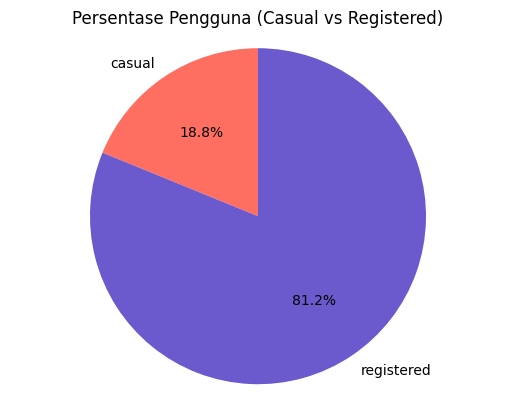

In [69]:
user_counts_data = df_day[['casual', 'registered']].sum()

# Plotting pie plot
fig_pie, ax_pie = plt.subplots()
ax_pie.pie(user_counts_data, labels=user_counts_data.index, autopct='%2.1f%%', startangle=90, colors=['#FF6F61', '#6A5ACD'])
ax_pie.axis('equal')
ax_pie.set_title("Persentase Pengguna (Casual vs Registered)")


ini adalah persentase dari jumlah pengguna Bike Sharing dari semua dataset 'day'

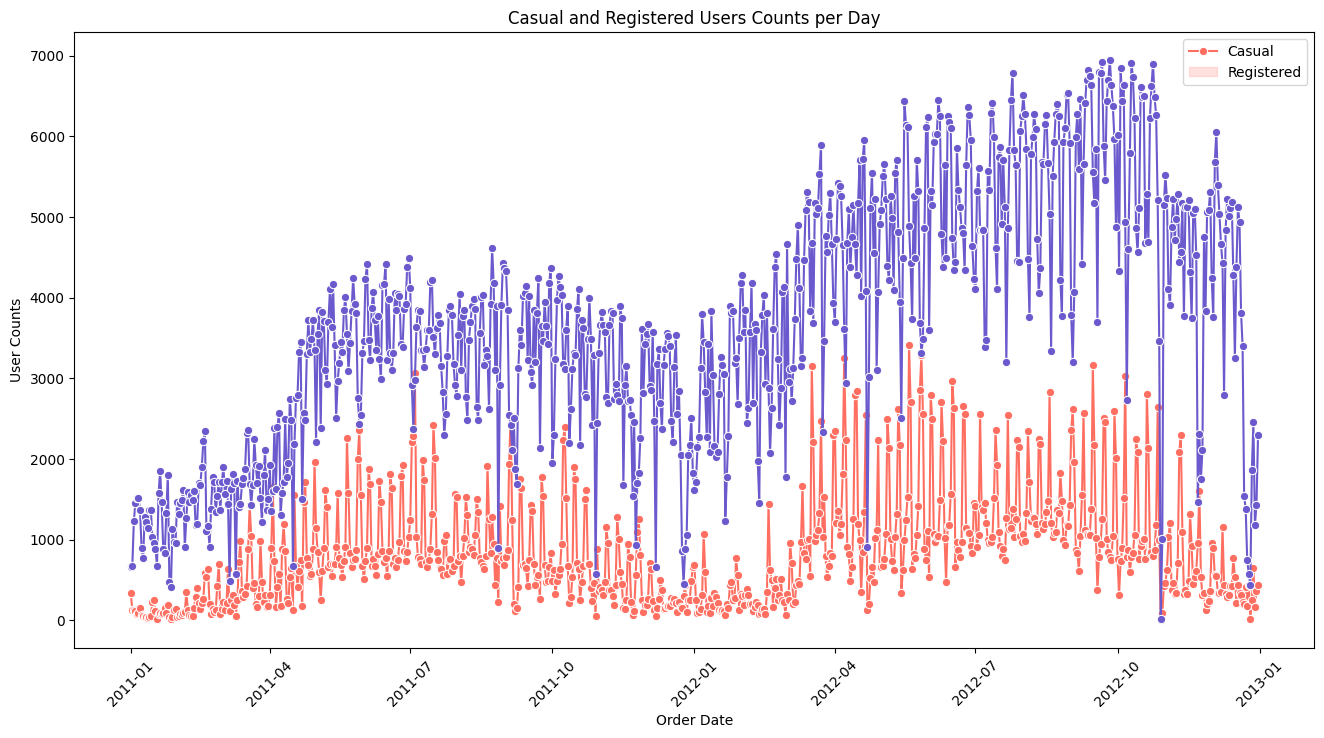

In [70]:
# set figure size
fig_fh3, ax_fh3 = plt.subplots(figsize=(16, 8))
# Plotting
sns.lineplot(x='dteday', y='casual', data=df_day, ax=ax_fh3, label='Casual', marker='o', color="#FF6F61")
sns.lineplot(x='dteday', y='registered', data=df_day, ax=ax_fh3, label='Registered', marker='o', color="#6A5ACD")
ax_fh3.set_ylabel("User Counts")
ax_fh3.set_xlabel("Order Date")
ax_fh3.set_title("Casual and Registered Users Counts per Day")
ax_fh3.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
ax_fh3.legend(["Casual", "Registered"])

Plot di atas adalah perubahan jumlah pengguna Bike Sharing setiap harinya

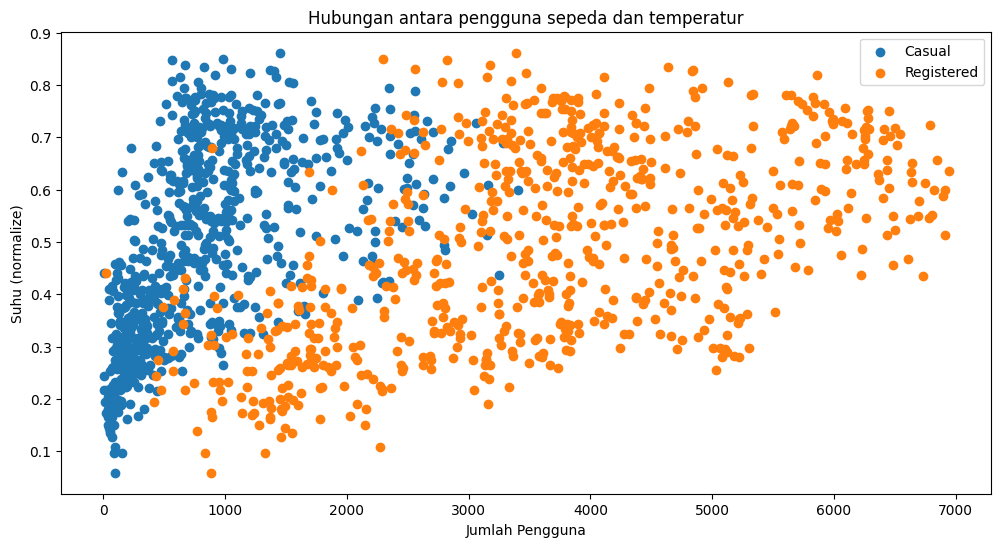

In [71]:
plt.figure(figsize=(12, 6))
plt.scatter(df_day['casual'], df_day['temp'], label='Casual')
plt.scatter(df_day['registered'], df_day['temp'], label='Registered')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Suhu (normalize)')
plt.legend()
plt.title('Hubungan antara pengguna sepeda dan temperatur')
plt.show()

Memvisualisasikan dataset `df_day` membantu memahami hubungan antara jumlah pengguna `casual` dan `registered` dengan suhu. Hasilnya menunjukkan bahwa saat suhu rendah, jumlah pengguna sepeda menurun, sedangkan saat suhu meningkat, jumlah pengguna sepeda cenderung lebih banyak.

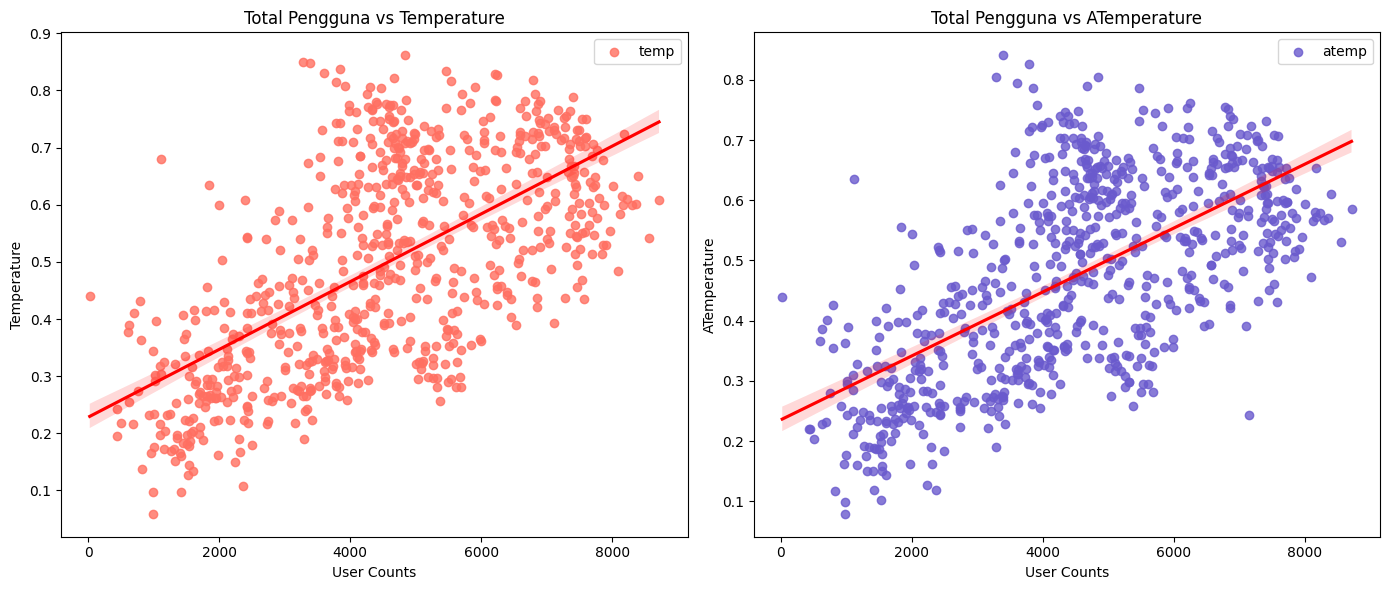

In [72]:
# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot pertama (kiri)
sns.regplot(x='cnt', y='temp', data=df_day, label='temp', color="#FF6F61", line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_ylabel("Temperature")
axes[0].set_xlabel("User Counts")
axes[0].set_title("Total Pengguna vs Temperature")
axes[0].legend()

# Plot kedua (kanan)
sns.regplot(x='cnt', y='atemp', data=df_day, label='atemp', color="#6A5ACD", line_kws={'color': 'red'}, ax=axes[1])
axes[1].set_ylabel("ATemperature")
axes[1].set_xlabel("User Counts")
axes[1].set_title("Total Pengguna vs ATemperature")
axes[1].legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


Dengan membuat garis regresi linear masing-masing untuk kedua plot , kita dapat melihat tren kenaikan jumlah pengguna saat temperatur lebi tinggi

### Pertanyaan 2:

In [73]:
# Langkah 1: Mapping angka asli menjadi nama musim
season_map = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Autumn'
}
df_day['season'] = df_day['season'].replace(season_map)
df_hour['season'] = df_hour['season'].replace(season_map)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17696\1225362475.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_day['season'] = df_day['season'].replace(season_map)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17696\1225362475.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_hour['season'] = df_hour['season'].replace(season_map)


Kode di atas mengganti nama kategori numerik (1, 2, 3, 4) pada kolom `season` menjadi nama yang lebih mudah dipahami, yaitu 'Winter', 'Spring', 'Summer', dan 'Autumn'. Ini bertujuan untuk mempermudah interpretasi data selama proses analisis.

C:\Users\DELL\AppData\Local\Temp\ipykernel_17696\2436389298.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_data= df_day.groupby('season').agg({


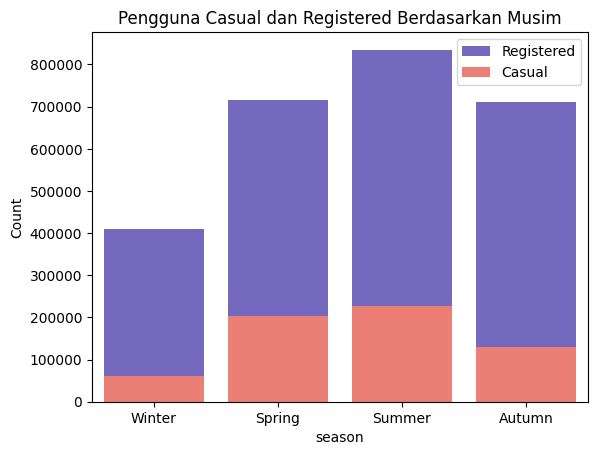

In [74]:
season_data= df_day.groupby('season').agg({
    'casual':'sum',
    'registered':'sum'
}).reset_index()
fig_fh1, ax_fh1 = plt.subplots()
sns.barplot(x='season', y='registered', data=season_data, ax=ax_fh1, label='Registered', color="#6A5ACD")
sns.barplot(x='season', y='casual', data=season_data, ax=ax_fh1, label='Casual', color="#FF6F61")
ax_fh1.set_ylabel("Count")
ax_fh1.set_title(f"Pengguna Casual dan Registered Berdasarkan Musim")
ax_fh1.legend()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17696\649210677.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_data= df_day.groupby('weathersit').agg({


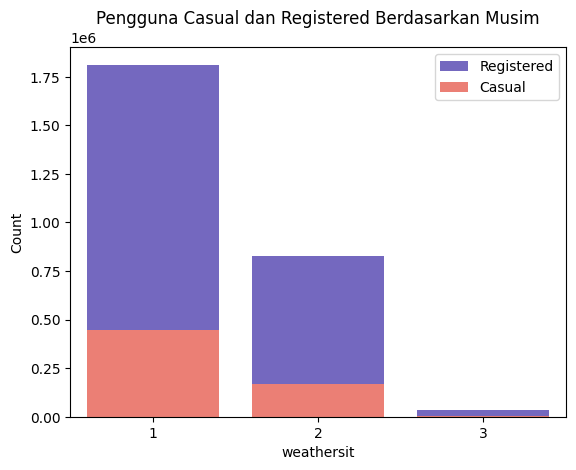

In [75]:
season_data= df_day.groupby('weathersit').agg({
    'casual':'sum',
    'registered':'sum'
}).reset_index()
fig_fh1, ax_fh1 = plt.subplots()
sns.barplot(x='weathersit', y='registered', data=season_data, ax=ax_fh1, label='Registered', color="#6A5ACD")
sns.barplot(x='weathersit', y='casual', data=season_data, ax=ax_fh1, label='Casual', color="#FF6F61")
ax_fh1.set_ylabel("Count")
ax_fh1.set_title(f"Pengguna Casual dan Registered Berdasarkan Musim")
ax_fh1.legend()


## Conclusion

Setelah melihat bahwa dataset `hour` merupakan rincian pengguna sepeda per jam dari dataset `day`, kita dapat menggunakan dataset `day` yang lebih relevan dengan pertanyaan kita. Berikut adalah kesimpulan dari kedua pertanyaan setelah melakukan **Visualization & Explanatory Analysis**:

1. **Pertanyaan 1: Apa faktor yang paling berpengaruh pada jumlah pengguna sepeda registered dan casual?**  
   Dari analisis korelasi antar variabel, ditemukan bahwa temperatur adalah faktor yang paling berpengaruh dalam menentukan jumlah pengguna sepeda. Visualisasi menunjukkan bahwa semakin tinggi suhu, semakin banyak pengguna sepeda.

2. **Pertanyaan 2: Pada musim apa pengguna sepeda registered dan casual paling sering menggunakan jasa Bike Sharing?**  
   Berdasarkan plot pivot table terakhir, baik untuk pengguna Casual maupun Registered, musim **Summer** memiliki jumlah pengguna paling tinggi.

Dari kedua pertanyaan tersebut, dapat disimpulkan bahwa pengguna Bike Sharing cenderung lebih banyak bersepeda pada suhu yang lebih tinggi, yaitu pada musim panas (Summer), sementara pada musim dingin, jumlah pengguna sangat sedikit karena suhu udara yang sangat rendah.